# 2.1 Importing Data Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from sklearn.linear_model import LogisticRegression

# 2.2 Reading the csv file


In [ ]:
telco_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2.3 Clean the dataset


In [ ]:
# Check if TotalCharges is in numerical data type
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Convert TotalCharges to numeric
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'],errors='coerce')

In [ ]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check for any null value exist in the dataframe
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Drop rows that contains null values
new_telco_data = telco_data.dropna()
print(new_telco_data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Drop customerid
new_telco_data = new_telco_data.drop(['customerID'],axis=1)
new_telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
# Convert all upper case to lower case to standardize the data 
new_telco_data = new_telco_data.applymap(lambda s: s.lower() if type(s) == object else s)
new_telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Convert yes/no data to 1/0 
new_telco_data['Dependents'] = new_telco_data['Dependents'].map({'No':0, 'Yes':1})
new_telco_data['PhoneService'] = new_telco_data['PhoneService'].map({'No':0, 'Yes':1})
#new_telco_data['OnlineSecurity'] = new_telco_data['OnlineSecurity'].map({'No':0, 'Yes':1})
#new_telco_data['OnlineBackup'] = new_telco_data['OnlineBackup'].map({'No':0, 'Yes':1})
#new_telco_data['DeviceProtection'] = new_telco_data['DeviceProtection'].map({'No':0, 'Yes':1})
#new_telco_data['TechSupport'] = new_telco_data['TechSupport'].map({'No':0, 'Yes':1})
#new_telco_data['StreamingTV'] = new_telco_data['StreamingTV'].map({'No':0, 'Yes':1})
#new_telco_data['StreamingMovies'] = new_telco_data['StreamingMovies'].map({'No':0, 'Yes':1})
new_telco_data['PaperlessBilling'] = new_telco_data['PaperlessBilling'].map({'No':0, 'Yes':1})
new_telco_data['Partner'] = new_telco_data['Partner'].map({'No':0, 'Yes':1})
new_telco_data['Churn'] = new_telco_data['Churn'].map({'No':0, 'Yes':1})
new_telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


# 2.4 Data Visualization


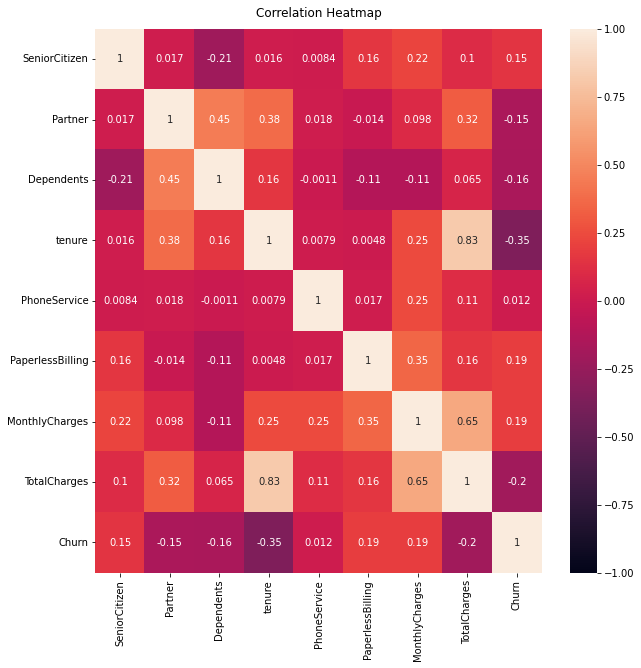

In [ ]:
plt.figure(figsize=(10, 10))

heatmap = sns.heatmap(new_telco_data.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


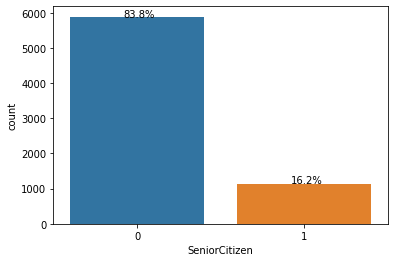

<Figure size 432x288 with 0 Axes>

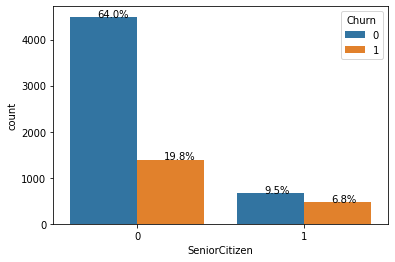

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'SeniorCitizen', data = new_telco_data)
plt.figure()

total = len(new_telco_data['SeniorCitizen'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'SeniorCitizen', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['SeniorCitizen'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

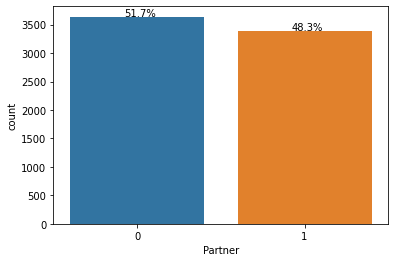

<Figure size 432x288 with 0 Axes>

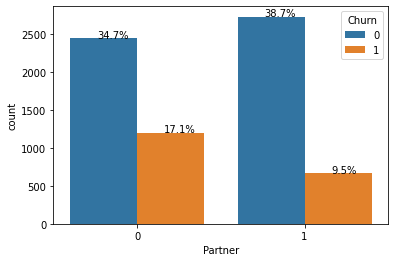

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'Partner', data = new_telco_data)
plt.figure()

total = len(new_telco_data['Partner'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'Partner', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['Partner'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

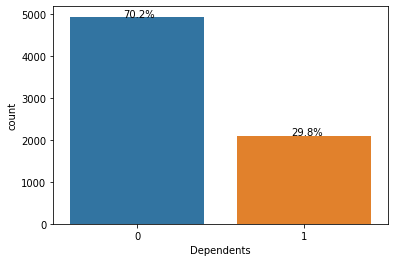

<Figure size 432x288 with 0 Axes>

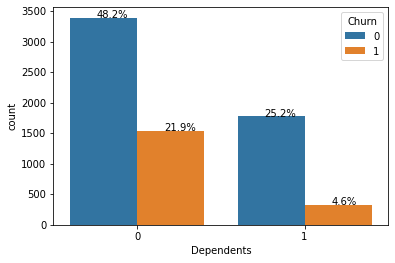

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'Dependents', data = new_telco_data)
plt.figure()

total = len(new_telco_data['Dependents'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'Dependents', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['Dependents'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

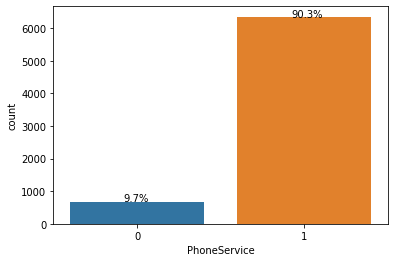

<Figure size 432x288 with 0 Axes>

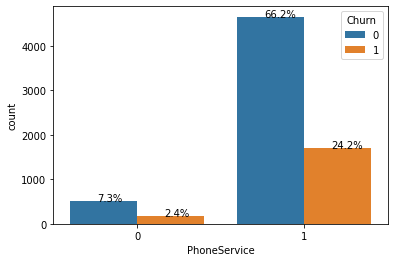

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'PhoneService', data = new_telco_data)
plt.figure()

total = len(new_telco_data['PhoneService'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'PhoneService', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['PhoneService'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

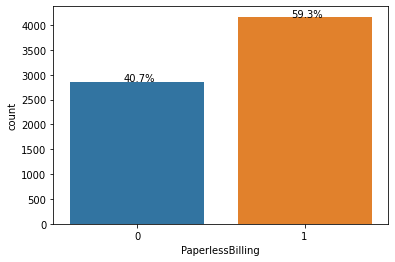

<Figure size 432x288 with 0 Axes>

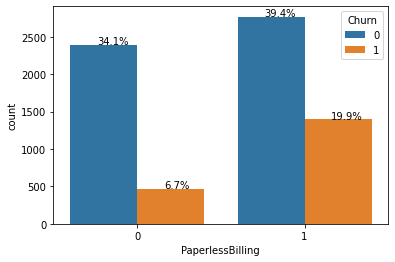

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'PaperlessBilling', data = new_telco_data)
plt.figure()

total = len(new_telco_data['PaperlessBilling'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'PaperlessBilling', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['PaperlessBilling'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

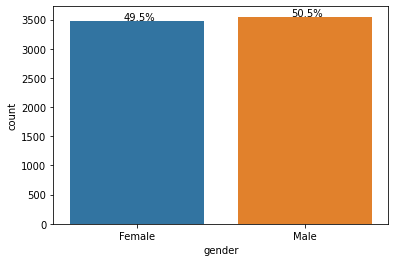

<Figure size 432x288 with 0 Axes>

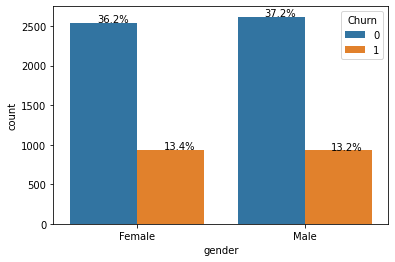

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'gender', data = new_telco_data)
plt.figure()

total = len(new_telco_data['gender'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'gender', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['gender'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

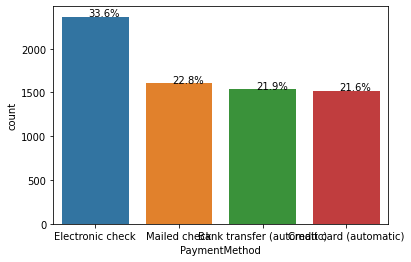

<Figure size 432x288 with 0 Axes>

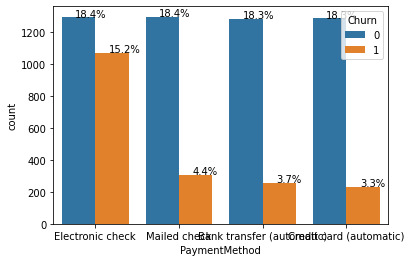

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'PaymentMethod', data = new_telco_data)
plt.figure()

total = len(new_telco_data['PaymentMethod'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'PaymentMethod', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['PaymentMethod'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

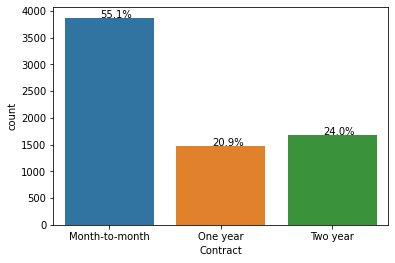

<Figure size 432x288 with 0 Axes>

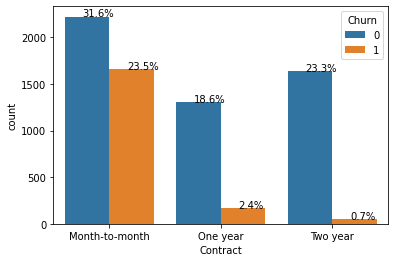

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'Contract', data = new_telco_data)
plt.figure()

total = len(new_telco_data['Contract'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'Contract', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['Contract'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

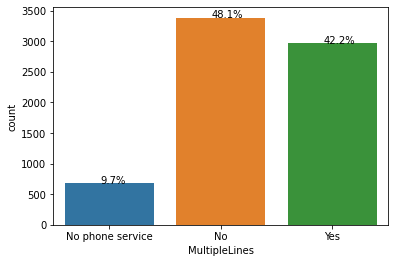

<Figure size 432x288 with 0 Axes>

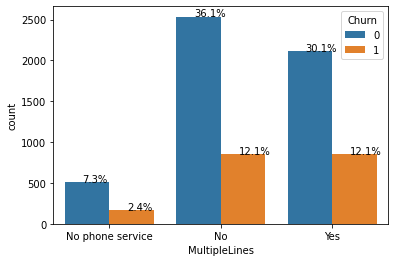

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'MultipleLines', data = new_telco_data)
plt.figure()

total = len(new_telco_data['MultipleLines'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'MultipleLines', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['MultipleLines'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

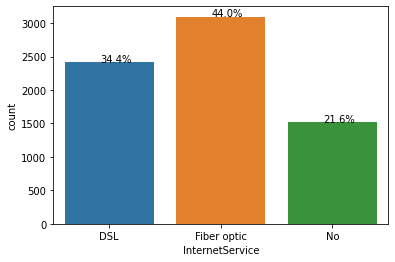

<Figure size 432x288 with 0 Axes>

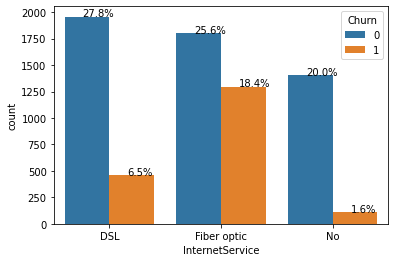

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'InternetService', data = new_telco_data)
plt.figure()

total = len(new_telco_data['InternetService'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'InternetService', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['InternetService'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

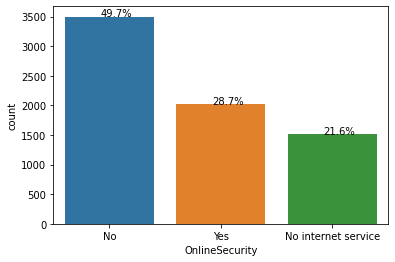

<Figure size 432x288 with 0 Axes>

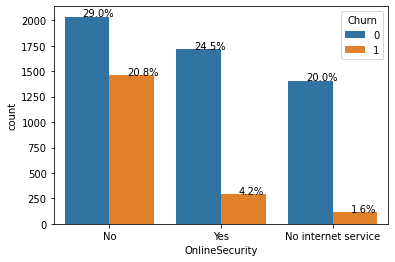

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'OnlineSecurity', data = new_telco_data)
plt.figure()

total = len(new_telco_data['OnlineSecurity'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'OnlineSecurity', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['OnlineSecurity'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

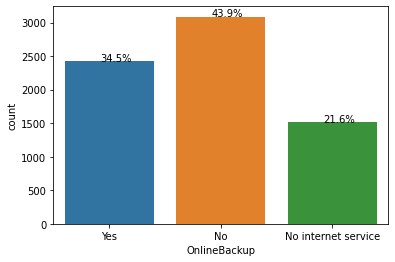

<Figure size 432x288 with 0 Axes>

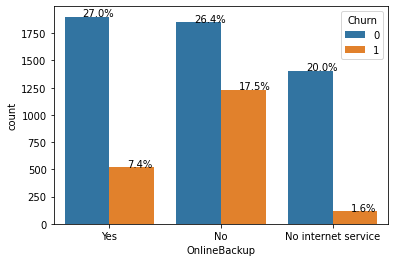

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'OnlineBackup', data = new_telco_data)
plt.figure()

total = len(new_telco_data['OnlineBackup'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'OnlineBackup', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['OnlineBackup'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

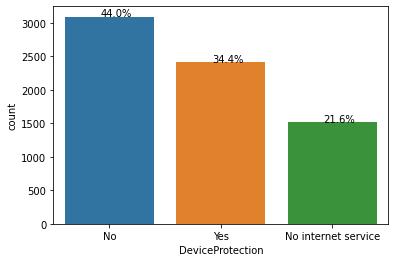

<Figure size 432x288 with 0 Axes>

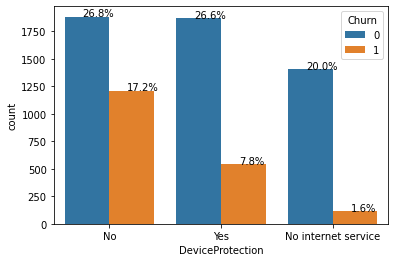

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'DeviceProtection', data = new_telco_data)
plt.figure()

total = len(new_telco_data['DeviceProtection'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'DeviceProtection', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['DeviceProtection'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

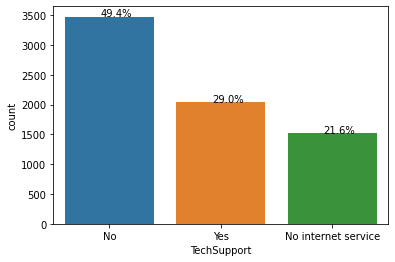

<Figure size 432x288 with 0 Axes>

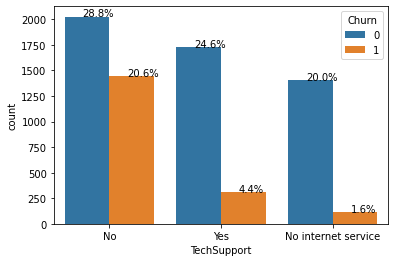

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'TechSupport', data = new_telco_data)
plt.figure()

total = len(new_telco_data['TechSupport'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'TechSupport', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['TechSupport'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

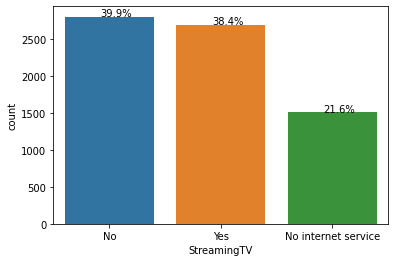

<Figure size 432x288 with 0 Axes>

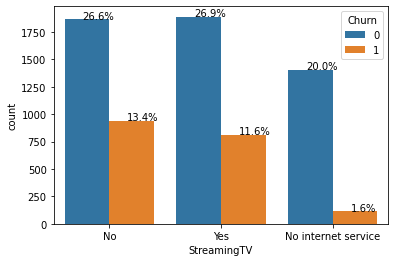

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'StreamingTV', data = new_telco_data)
plt.figure()

total = len(new_telco_data['StreamingTV'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'StreamingTV', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['StreamingTV'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

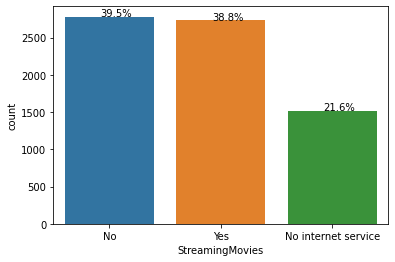

<Figure size 432x288 with 0 Axes>

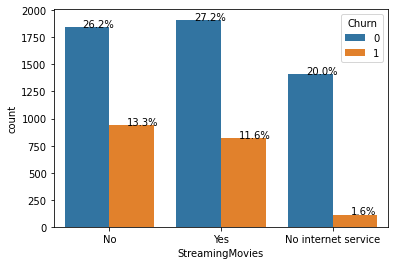

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = sns.countplot(x = 'StreamingMovies', data = new_telco_data)
plt.figure()

total = len(new_telco_data['StreamingMovies'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

ax = sns.countplot(x = 'StreamingMovies', data = new_telco_data, hue = 'Churn')
plt.figure()

total = len(new_telco_data['StreamingMovies'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2.5
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y))
plt.show()

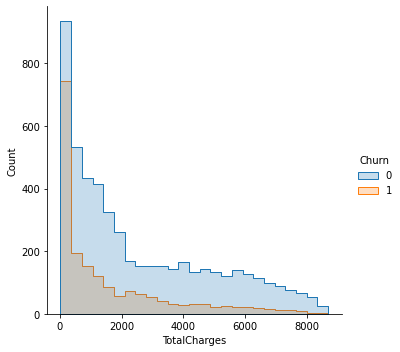

In [ ]:
sns.displot(new_telco_data, x='TotalCharges', hue='Churn', element='step')

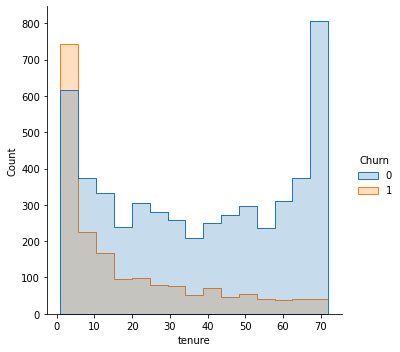

In [ ]:
sns.displot(new_telco_data, x='tenure', hue='Churn', element='step')

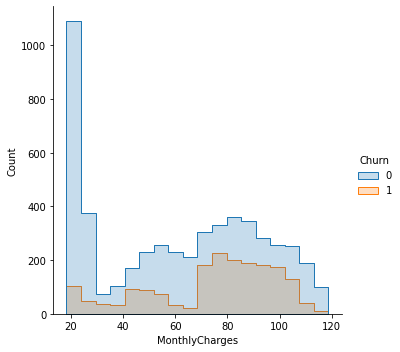

In [ ]:
sns.displot(new_telco_data, x='MonthlyCharges', hue='Churn', element='step')

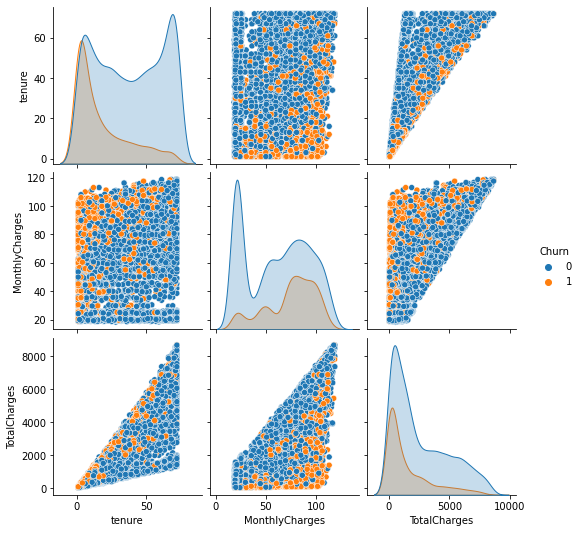

In [ ]:
sns.pairplot(new_telco_data,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

# 2.5 Preparing data for Logistic Regression


In [ ]:
# Drop gender column as 
new_telco_data = new_telco_data.drop(['gender'],axis=1)

In [ ]:
# Converting the categorical variables into dummy variables

telco_dummy = pd.get_dummies(new_telco_data, drop_first=True)
telco_dummy.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,0,...,0,0,0,0,0,0,0,0,1,0


# 2.6 Generating train & test data

In [ ]:
# X is features/ attribute and y is target variable
X = telco_dummy.drop(['Churn'],axis=1)
y = telco_dummy['Churn']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
# Declare Logistic Regression model and fit it to the training dataset
log_regressor = LogisticRegression()
log_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

# 2.7 Predict future churn


In [ ]:
y_pred = log_regressor.predict(X_test)

# 2.8 Evaluate your model


In [ ]:
# Find confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1181,  130],
       [ 219,  228]])

In [ ]:
#Find accuracy from confusion matrix

total_len=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total_len
print ('Accuracy : ', accuracy)

Accuracy :  0.8014789533560864


In [ ]:
# Calculate precision & recall
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1311
           1       0.64      0.51      0.57       447

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



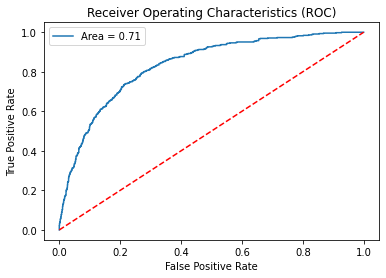

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,log_regressor.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Area = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC)')
plt.legend()
plt.savefig('AUC_visualization.png')
plt.show()